<a href="https://colab.research.google.com/github/DakshCodes13/EEA_WINTER_PROJECT/blob/main/ASSIGNMENT_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import f1_score
from sklearn .metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
df = pd.read_csv('/content/ai4i2020.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
duplicate = df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [UDI, Product ID, Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Machine failure, TWF, HDF, PWF, OSF, RNF]
Index: []


In [5]:
df.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Machine failure,0
TWF,0


In [6]:
failure_counts = df['Machine failure'].value_counts()
print(failure_counts)

Machine failure
0    9661
1     339
Name: count, dtype: int64


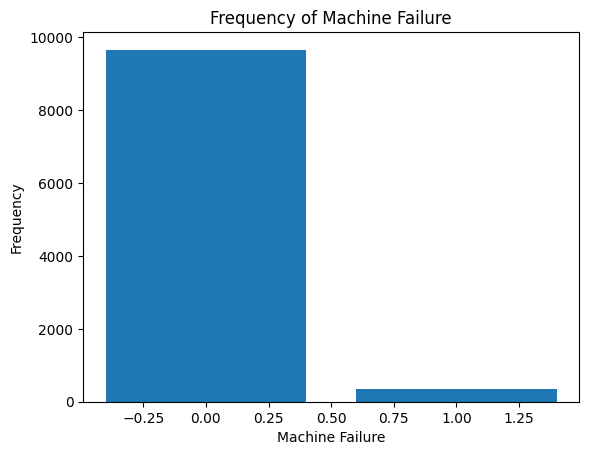

In [7]:
# Calculate the frequency of each category in 'Machine failure'
failure_counts = df['Machine failure'].value_counts()

# Create the bar plot
plt.bar(failure_counts.index, failure_counts)
plt.xlabel('Machine Failure')
plt.ylabel('Frequency')
plt.title('Frequency of Machine Failure')
plt.show()

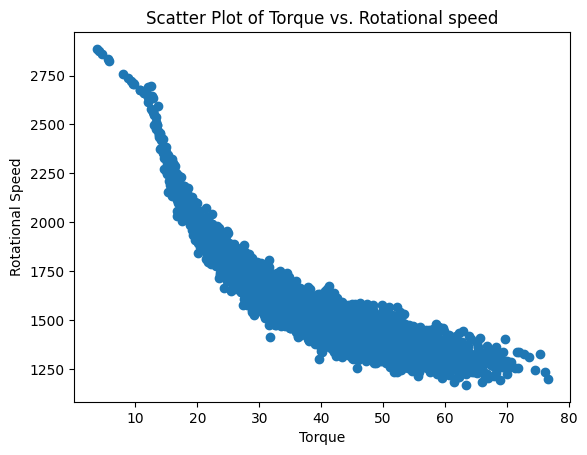

In [8]:
plt.scatter(df['Torque [Nm]'],df['Rotational speed [rpm]']) # Use plt.scatter to create the scatter plot
plt.xlabel("Torque") # Add labels to the plot
plt.ylabel("Rotational Speed")
plt.title("Scatter Plot of Torque vs. Rotational speed")#for rainforest regressor
plt.show() # Display the plot

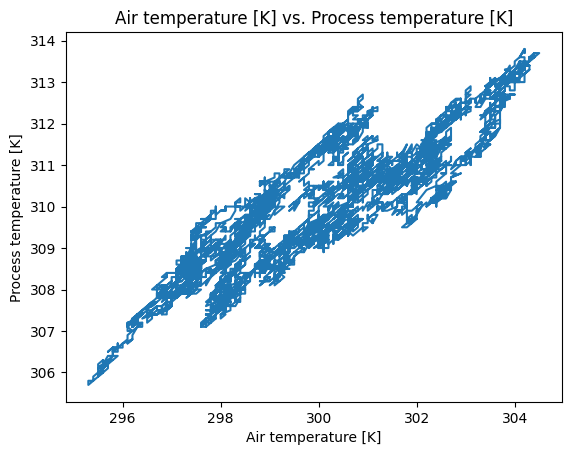

In [9]:
plt.plot(df['Air temperature [K]'],df['Process temperature [K]']) # Use plt.scatter to create the scatter plot
plt.xlabel("Air temperature [K]")
plt.ylabel("Process temperature [K]")
plt.title("Air temperature [K] vs. Process temperature [K]")#
plt.show() # Display the plot

In [10]:
newdf = df.select_dtypes(include='number')
corrM = newdf.corr()
corrM

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892,0.009154,-0.022215,-0.023557,-0.000990,-0.005954
Air temperature [K],0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688
Process temperature [K],0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279
Rotational speed [rpm],-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.010389,-0.121241,0.123018,-0.104575,-0.013088
Torque [Nm],0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136
Tool wear [min],-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326
Machine failure,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516
TWF,0.009154,0.009955,0.007315,0.010389,-0.014662,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970
HDF,-0.022215,0.137831,0.056933,-0.121241,0.142610,-0.001287,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706
PWF,-0.023557,0.003470,-0.003355,0.123018,0.083781,-0.009334,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273


<Axes: >

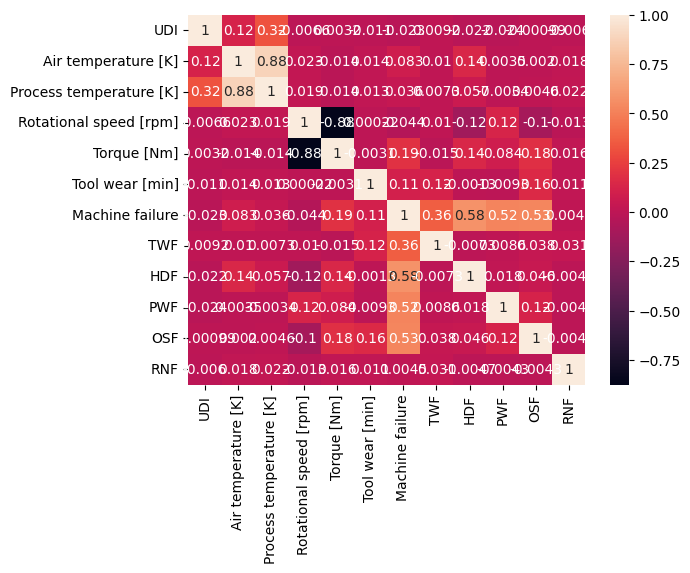

In [11]:
sns.heatmap(corrM,annot=True)



In [12]:
#osf,pwf, hdf, twf are the most impact on the model because their correlation coefficient is high with the target variable

In [13]:
df['Product ID'].unique()

array(['M14860', 'L47181', 'L47182', ..., 'M24857', 'H39412', 'M24859'],
      dtype=object)

In [14]:
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [15]:
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Type']= label_encoder.fit_transform(df['Type'])

df['Type'].unique()

array([2, 1, 0])

In [16]:
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Product ID']= label_encoder.fit_transform(df['Product ID'])

df['Product ID'].unique()

array([7003, 1003, 1004, ..., 9998, 1002, 9999])

In [17]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,7003,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,1003,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,1004,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,1005,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,1006,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [18]:
 # scale features

scaler = MinMaxScaler()
model=scaler.fit(df[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Machine failure','TWF','HDF','PWF','OSF','RNF']])
scaled_data=model.transform(df[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Machine failure','TWF','HDF','PWF','OSF','RNF']])

# print scaled features
print(scaled_data)


[[0.30434783 0.35802469 0.22293364 ... 0.         0.         0.        ]
 [0.31521739 0.37037037 0.13969732 ... 0.         0.         0.        ]
 [0.30434783 0.34567901 0.19208382 ... 0.         0.         0.        ]
 ...
 [0.40217391 0.35802469 0.27764843 ... 0.         0.         0.        ]
 [0.40217391 0.37037037 0.13969732 ... 0.         0.         0.        ]
 [0.40217391 0.37037037 0.19324796 ... 0.         0.         0.        ]]


In [19]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,7003,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,1003,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,1004,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,1005,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,1006,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [20]:
df2 = pd.DataFrame(scaled_data, columns=['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Machine failure','TWF','HDF','PWF','OSF','RNF'])
df.update(df2)

<ipython-input-20-7312dca7ee7b>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.22293364 0.13969732 0.19208382 ... 0.27764843 0.13969732 0.19324796]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.update(df2)
<ipython-input-20-7312dca7ee7b>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.01185771 0.01976285 ... 0.08695652 0.09881423 0.11857708]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.update(df2)


In [21]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,7003,2,0.304348,0.358025,0.222934,0.535714,0.000000,0,0,0,0,0,0
1,2,1003,1,0.315217,0.370370,0.139697,0.583791,0.011858,0,0,0,0,0,0
2,3,1004,1,0.304348,0.345679,0.192084,0.626374,0.019763,0,0,0,0,0,0
3,4,1005,1,0.315217,0.358025,0.154249,0.490385,0.027668,0,0,0,0,0,0
4,5,1006,1,0.315217,0.370370,0.139697,0.497253,0.035573,0,0,0,0,0,0


In [22]:
arr = np.array(['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Type'])
x = df[arr].values
y = df['Machine failure'].to_numpy()

print("Features")
print(x)
print(x.shape)
print("Machine failure")
print(y)
print(y.shape)


x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2) #Train-Test Split : Use an 80:20 split for training and testing


Features
[[0.30434783 0.35802469 0.22293364 0.53571429 0.         2.        ]
 [0.31521739 0.37037037 0.13969732 0.58379121 0.01185771 1.        ]
 [0.30434783 0.34567901 0.19208382 0.62637363 0.01976285 1.        ]
 ...
 [0.40217391 0.35802469 0.27764843 0.40659341 0.08695652 2.        ]
 [0.40217391 0.37037037 0.13969732 0.61401099 0.09881423 0.        ]
 [0.40217391 0.37037037 0.19324796 0.5        0.11857708 2.        ]]
(10000, 6)
Machine failure
[0 0 0 ... 0 0 0]
(10000,)


In [23]:
clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [24]:
param_distributions = {
    'C': uniform(0.01, 10.0),  # Use 'C' instead of 'alpha' for regularization
    'penalty': ['l1', 'l2'] #add penalty for the regularization type
}

random_search = RandomizedSearchCV(clf,
                                   param_distributions)
random_search.fit(x, y)

# Print the optimal values for the hyperparameters
print(random_search.best_params_)

{'C': 8.956928458585207, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

In [25]:
predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, predictions) # Calculate accuracy with corrected inputs
print(predictions)
print(accuracy)
precision = precision_score(y_test, predictions)
print('Precision: ',precision)
recall = recall_score(y_test, predictions)
print('Recall: ',recall)
f1_weighted = f1_score(y_test, predictions, average='weighted')
print('Weighted-average F1 score: ', f1_weighted)
# Change the variable name to avoid overwriting the function


[0 0 0 ... 0 0 0]
0.9685
Precision:  1.0
Recall:  0.015625
Weighted-average F1 score:  0.9534867754862673


In [26]:
#the model is performing quite well because the accuracy is pretty high

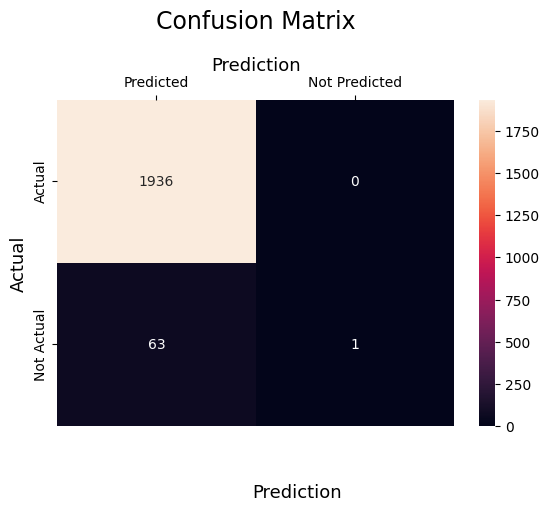

In [27]:
sns.heatmap(confusion_matrix(y_test, predictions),
            annot=True,
            fmt='g',
            xticklabels=['Predicted','Not Predicted'],
            yticklabels=['Actual','Not Actual'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [28]:
#here logistic regression will be a better choice because there are only two possible outputs

In [29]:
auc = np.round(roc_auc_score(y_test, predictions), 3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.508


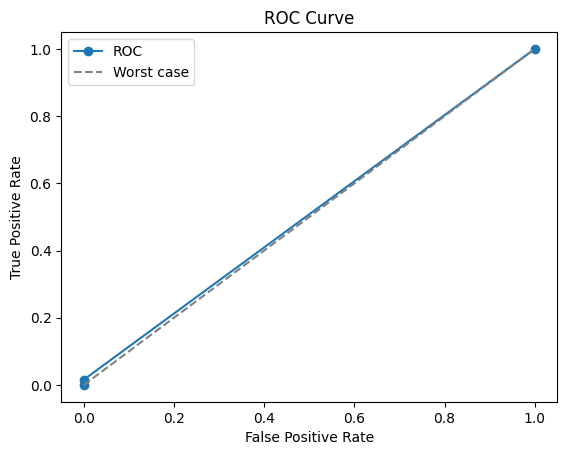

In [30]:

# Calculate the false positive rate and true positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)

# Now you can plot the ROC curve
plt.plot(false_positive_rate, true_positive_rate, 'o-', label='ROC')
plt.plot([0, 1], [0, 1], '--', color='grey', label='Worst case')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [31]:
#not using less important features might be quite useful for this model
#more and diverse data set always results in better performing model